In [1]:
# LangChain basics
from langchain.chat_models import ChatOpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.chains import create_extraction_chain
from langchain_openai import ChatOpenAI
# Vector Store and retrievals
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain.vectorstores import Chroma, Pinecone
import pinecone

In [2]:
# Chat Prompt templates for dynamic values
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate
)
# Supporting libraries
import os
from dotenv import load_dotenv


In [3]:
#dotenv
from openai import OpenAI


In [5]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm3
chain.invoke(
    {
        "input_language": "English",
        "output_language": "Turkish",
        "input": "I love programming.",
    }
)

AIMessage(content='Ben programlamayı seviyorum.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 26, 'total_tokens': 37, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-256cf964-b49e-41ad-9d47-91aaa9a025aa-0', usage_metadata={'input_tokens': 26, 'output_tokens': 11, 'total_tokens': 37, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from PyPDF2 import PdfReader 
import pandas as pd
import os

In [7]:
from pathlib import Path
pdFiles=os.listdir('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/PDFS')
print(len(pdFiles))
print(pdFiles)

41
['ch1execsum.pdf', 'exec-sum.pdf', 'exec-summary.pdf', 'execsum (10).pdf', 'execsum (11).pdf', 'execsum (3).pdf', 'execsum (4).pdf', 'execsum (5).pdf', 'execsum (6).pdf', 'execsum (7).pdf', 'execsum (8).pdf', 'execsum (9).pdf', 'execsum.pdf', 'ExecSummary.pdf', 'sum1.pdf', '_annexpdf (1).pdf', '_annexpdf (2).pdf', '_annexpdf (3).pdf', '_annexpdf (4).pdf', '_annexpdf (5).pdf', '_annexpdf.pdf', '_ExecSummarypdf.pdf', '_execsumpdf (1).pdf', '_execsumpdf (2).pdf', '_execsumpdf.pdf', '_execsumpdfff (1).pdf', '_execsumpdffff.pdf', '_exesumpdf (1).pdf', '_exesumpdf (2).pdf', '_exesumpdf (3).pdf', '_exesumpdf.pdf', '_summarypdf (1).pdf', '_summarypdf (1)4.pdf', '_summarypdf (2).pdf', '_summarypdf (2)4.pdf', '_summarypdf (3).pdf', '_summarypdf (4).pdf', '_summarypdf (5).pdf', '_summarypdf.pdf', '_summarypdf4.pdf', '_summarypdfffff4.pdf']


In [9]:
reader=[]
t=[]
file=[]
res=[]
for i in range(len(pdFiles)):
    reader.append(PdfReader(f'C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/PDFS/{pdFiles[i]}'))
reader

In [10]:
reader = PdfReader(f'C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/PDFS/{pdFiles[0]}')
#print(pdFiles[0])
for j in range(len(reader.pages)):
    page = reader.pages[j]
    t.append(page.extract_text())    
    t[0:len(t)] = ''.join(t[0:len(t)])
    res.append(''.join(t))

In [11]:
res

['x International Monetary Fund | April 2020\nEXECUTIVE SUMMARY\nThe coronavirus (COVID-19) pandemic presents \na historic challenge. In mid-February, when market \nparticipants started to fear that the outbreak would \nbecome a global pandemic, the prices of equities fell \nsharply, from previously overstretched levels. In credit \nmarkets, spreads skyrocketed, especially in risky seg-\nments such as high-yield bonds, leveraged loans, and \nprivate debt, where issuance essentially came to a halt. \nOil prices plummeted in the face of weakening global \ndemand and the failure of the OPEC+ countries to \nreach an agreement on output cuts, adding a further \nleg to the deterioration in risk appetite. These volatile \nmarket conditions led to a flight to quality, with yields \non safe-haven bonds declining abruptly.\nA number of factors amplified asset price moves, \ncontributing to a sharp tightening of financial condi-\ntions at unprecedented speed. Signs of strain emerged \nin major sh

In [12]:
len(res)

2

In [13]:
res[1]

'x International Monetary Fund | April 2020\nEXECUTIVE SUMMARY\nThe coronavirus (COVID-19) pandemic presents \na historic challenge. In mid-February, when market \nparticipants started to fear that the outbreak would \nbecome a global pandemic, the prices of equities fell \nsharply, from previously overstretched levels. In credit \nmarkets, spreads skyrocketed, especially in risky seg-\nments such as high-yield bonds, leveraged loans, and \nprivate debt, where issuance essentially came to a halt. \nOil prices plummeted in the face of weakening global \ndemand and the failure of the OPEC+ countries to \nreach an agreement on output cuts, adding a further \nleg to the deterioration in risk appetite. These volatile \nmarket conditions led to a flight to quality, with yields \non safe-haven bonds declining abruptly.\nA number of factors amplified asset price moves, \ncontributing to a sharp tightening of financial condi-\ntions at unprecedented speed. Signs of strain emerged \nin major sho

In [14]:
res=' '.join(res)

In [15]:
type(res)

str

In [16]:
#ttt=[]
res[:50]

'x International Monetary Fund | April 2020\nEXECUTI'

In [17]:
ttt=[]
ttt.append(res[:50])
print(ttt)

['x International Monetary Fund | April 2020\nEXECUTI']


In [18]:
# Load up your text splitter
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", " "], chunk_size=10000, chunk_overlap=2200)

# I'm only doing the first 23250 characters. This to save on costs. When you're doing your exercise you can remove this to let all the data through
#transcript_subsection_characters = 23250
docs = text_splitter.create_documents([res])
print (f"You have {len(docs)} docs. First doc is {llm3.get_num_tokens(docs[0].page_content)} tokens")

You have 2 docs. First doc is 1999 tokens


In [19]:
type(docs)

list

In [20]:
docs

[Document(metadata={}, page_content='x International Monetary Fund | April 2020\nEXECUTIVE SUMMARY\nThe coronavirus (COVID-19) pandemic presents \na historic challenge. In mid-February, when market \nparticipants started to fear that the outbreak would \nbecome a global pandemic, the prices of equities fell \nsharply, from previously overstretched levels. In credit \nmarkets, spreads skyrocketed, especially in risky seg-\nments such as high-yield bonds, leveraged loans, and \nprivate debt, where issuance essentially came to a halt. \nOil prices plummeted in the face of weakening global \ndemand and the failure of the OPEC+ countries to \nreach an agreement on output cuts, adding a further \nleg to the deterioration in risk appetite. These volatile \nmarket conditions led to a flight to quality, with yields \non safe-haven bonds declining abruptly.\nA number of factors amplified asset price moves, \ncontributing to a sharp tightening of financial condi-\ntions at unprecedented speed. Si

In [21]:
dff= pd.read_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/Docpdfs.xlsx')
dff.head()#######################


Unnamed: 0       Date  Sent_Num  Parag_Num  \
0           0 2020-04-01        53          2   
1           1 2018-04-01        27          2   
2           2 2017-10-01        87          4   
3           3 2019-10-01        42          2   
4           4 2019-04-01        52          2   

                                             Context  
0  x international monetary fund | april 2020 the...  
1  [' international monetary fund | april 2018 xi...  
2  ['x international monetary fund | october 2017...  
3  [' international monetary fund | october 2019 ...  
4  [' international monetary fund | april 2019 ix...

In [22]:
df=dff[['Context']]
df['Context']=df['Context'].apply(lambda x: ' '.join([word for word in x.split()]))
df

C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_14652\1697632271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Context']=df['Context'].apply(lambda x: ' '.join([word for word in x.split()]))


Context
0   x international monetary fund | april 2020 the...
1   [' international monetary fund | april 2018 xi...
2   ['x international monetary fund | october 2017...
3   [' international monetary fund | october 2019 ...
4   [' international monetary fund | april 2019 ix...
5   [' international monetary fund | october 2023 ...
6   ['xii international monetary fund | april 2023...
7   [' international monetary fund | october 2022 ...
8   [' international monetary fund | april 2022 xi...
9   [' international monetary fund | october 2021 ...
10  [' international monetary fund | april 2021 ix...
11  [' international monetary fund | october 2020 ...
12  [' international monetary fund | october 2023 ...
13  [' international monetary fund | april 2017 ix...
14  [' international monetary fund | october 2018 ...
15  ['general remarks on the gfsrexecutive directo...
16  ['executive directors welcomed the fur-ther st...
17  ['158annexexecutive directors welcomed the con...
18  ['120annexexecutive directors welcomed theoppo...
19  ["99annexexecutive directors welcomed the firs...
20  ['132summing up by the chairman assessment of ...
21  [' international monetary fund | october 2016 ...
22  [' international monetary fund | october 2015 ...
23  [' international monetary fund | april 2015 ix...
24  [' international monetary fund | april 2016 ix...
25  [' in ternational monetary fund | april 2014 i...
26  [' international monetary fund | october 2014 ...
27  [' international monetary fund | april 2013 xi...
28  [' international monetary fund | october 2012 ...
29  [' xii international monetary fund | april 201...
30  [' international monetary fund | october 2013 ...
31  [' international monetary fund | october 2010 ...
32  ['xixiconﬁdence in global ﬁnancial institution...
33  [' xi risks to global financial stability have...
34  ['ixixexecutive\t summar ythe events of the pa...
35  ['ixixsince the april 2007 global financial st...
36  ['ixixfavorable global economic prospects, par...
37  ['ixinternational financial markets experience...
38  [' international monetary fund | april 2011 xi...
39  ['xvprospects for the road aheadthe immediate ...
40  ['xi the global financial system remains under...

In [23]:
df_list=df["Context"].values.tolist()
df_list

['x international monetary fund | april 2020 the coronavirus (covid-19) pandemic presents a historic challenge. in mid-february, when market participants started to fear that the outbreak would become a global pandemic, the prices of equities fell sharply, from previously overstretched levels. in credit markets, spreads skyrocketed, especially in risky segments such as high-yield bonds, leveraged loans, and private debt, where issuance essentially came to a halt. oil prices plummeted in the face of weakening global demand and the failure of the opec+ countries to reach an agreement on output cuts, adding a further leg to the deterioration in risk appetite. these volatile market conditions led to a flight to quality, with yields on safe-haven bonds declining abruptly. a number of factors amplified asset price moves, contributing to a sharp tightening of financial conditions at unprecedented speed. signs of strain emerged in major short-term funding markets, including the global market f

In [26]:
len(df_list)

41

In [29]:
type(df_list[1])

str

In [34]:
# Load up your text splitter
#text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", " "], chunk_size=10000, chunk_overlap=2200)

# I'm only doing the first 23250 characters. This to save on costs. When you're doing your exercise you can remove this to let all the data through
#transcript_subsection_characters = 23250
docs = text_splitter.create_documents(df_list)
print (f"You have {len(docs)} docs. First doc is {llm3.get_num_tokens(docs[0].page_content)} tokens")

You have 140 docs. First doc is 1790 tokens


In [35]:
# Load up your text splitter
#text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", " "], chunk_size=10000, chunk_overlap=2200)

# I'm only doing the first 23250 characters. This to save on costs. When you're doing your exercise you can remove this to let all the data through
#transcript_subsection_characters = 23250
docs_Test = text_splitter.create_documents([df_list[0]])
docs_Test

[Document(metadata={}, page_content='x international monetary fund | april 2020 the coronavirus (covid-19) pandemic presents a historic challenge. in mid-february, when market participants started to fear that the outbreak would become a global pandemic, the prices of equities fell sharply, from previously overstretched levels. in credit markets, spreads skyrocketed, especially in risky segments such as high-yield bonds, leveraged loans, and private debt, where issuance essentially came to a halt. oil prices plummeted in the face of weakening global demand and the failure of the opec+ countries to reach an agreement on output cuts, adding a further leg to the deterioration in risk appetite. these volatile market conditions led to a flight to quality, with yields on safe-haven bonds declining abruptly. a number of factors amplified asset price moves, contributing to a sharp tightening of financial conditions at unprecedented speed. signs of strain emerged in major short-term funding mar

In [36]:
t=[]
for i in range(len(df_list)):
    t.append(text_splitter.create_documents([df_list[i]]))
t

[[Document(metadata={}, page_content='x international monetary fund | april 2020 the coronavirus (covid-19) pandemic presents a historic challenge. in mid-february, when market participants started to fear that the outbreak would become a global pandemic, the prices of equities fell sharply, from previously overstretched levels. in credit markets, spreads skyrocketed, especially in risky segments such as high-yield bonds, leveraged loans, and private debt, where issuance essentially came to a halt. oil prices plummeted in the face of weakening global demand and the failure of the opec+ countries to reach an agreement on output cuts, adding a further leg to the deterioration in risk appetite. these volatile market conditions led to a flight to quality, with yields on safe-haven bonds declining abruptly. a number of factors amplified asset price moves, contributing to a sharp tightening of financial conditions at unprecedented speed. signs of strain emerged in major short-term funding ma

In [37]:
print (f"You have {len(t)} docs. First doc is {llm3.get_num_tokens(t[1][1].page_content)} tokens")

You have 41 docs. First doc is 518 tokens


In [38]:

print(type([df_list[0]]))
print(type([res]))

<class 'list'>
<class 'list'>


In [39]:
res=' '.join(res)

In [40]:
print(len(df_list))
df_list[0]

41


'x international monetary fund | april 2020 the coronavirus (covid-19) pandemic presents a historic challenge. in mid-february, when market participants started to fear that the outbreak would become a global pandemic, the prices of equities fell sharply, from previously overstretched levels. in credit markets, spreads skyrocketed, especially in risky segments such as high-yield bonds, leveraged loans, and private debt, where issuance essentially came to a halt. oil prices plummeted in the face of weakening global demand and the failure of the opec+ countries to reach an agreement on output cuts, adding a further leg to the deterioration in risk appetite. these volatile market conditions led to a flight to quality, with yields on safe-haven bonds declining abruptly. a number of factors amplified asset price moves, contributing to a sharp tightening of financial conditions at unprecedented speed. signs of strain emerged in major short-term funding markets, including the global market fo

In [444]:
template="""
Extract the 10 topic names mentioned in the transcript provided, without including any numbers and avoiding the examples given.
"""
system_message_prompt_map = SystemMessagePromptTemplate.from_template(template)

human_template="Transcript: {text}" # Simply just pass the text as a human message
human_message_prompt_map = HumanMessagePromptTemplate.from_template(human_template)

chat_prompt_map = ChatPromptTemplate.from_messages(messages=[system_message_prompt_map, human_message_prompt_map])

In [445]:
template="""
Extract the 10 topic names mentioned in the transcript provided, without including any numbers and avoiding the examples given.
"""
system_message_prompt_map = SystemMessagePromptTemplate.from_template(template)

human_template="Transcript: {text}" # Simply just pass the text as a human message
human_message_prompt_map = HumanMessagePromptTemplate.from_template(human_template)

chat_prompt_combine = ChatPromptTemplate.from_messages(messages=[system_message_prompt_map, human_message_prompt_map])

In [446]:
chain = load_summarize_chain(llm4,
                             chain_type="map_reduce",
                             map_prompt=chat_prompt_map,
                             combine_prompt=chat_prompt_combine,
#                              verbose=True
                            )

In [615]:
#topics_found = chain.run({"input_documents": docs})
#topics=[[]]
#topics
topics_found = chain.run({"input_documents": t[41]})
topics_found

IndexError: list index out of range

In [612]:
#topics_found=topics_found.split('\n')
#print(topics_found)
#print(type(topics_found))
x=[topics_found]
#print(x)

In [613]:
#topics=[[]]
topics.extend(x)
topics

[[],
 '- International Monetary Fund\n- Coronavirus Pandemic\n- Global Financial Markets\n- Credit Markets\n- Portfolio Flows\n- Debt Restructurings\n- Monetary Policy\n- Fiscal Support Packages\n- Financial Stability\n- Economic Activity',
 '- Global Economic Outlook\n- Financial Stability\n- Monetary Policy\n- Inflation Risks\n- Risky Asset Prices\n- Financial Vulnerabilities\n- Banking Sector Resilience\n- Regulatory Reforms\n- Emerging Market Economies\n- Crypto Assets',
 '- Global Financial System\n- Monetary Policy Normalization\n- Financial Stability Risks\n- Asset Valuations\n- Nonbank Sector Vulnerabilities\n- Debt Servicing Pressures\n- Economic Recovery\n- Portfolio Adjustments\n- Emerging Market Economies\n- Financial Excesses',
 '- Global Economic Outlook\n- Monetary Policy Stance\n- Corporate Sector Vulnerabilities\n- Search for Yield\n- Nonbank Financial Institutions\n- Capital Flows to Emerging Markets\n- Debt Sustainability Risks\n- Banking Sector Resilience\n- Environ

In [614]:
#print(topics[len(topics)-1])
print(len(topics))
print(len(topics)-1)

42
41


In [616]:
#x=topics.copy()
x

['1. Global Financial System\n2. Economic Activity\n3. Banking Sector\n4. Credit Growth\n5. Public Support Packages\n6. International Coordination\n7. Financial Sector Policies\n8. Nonbank Financial Institutions\n9. Emerging Market Economies\n10. Policy Recommendations']

In [619]:
del topics[0]

In [620]:
len(topics)

41

In [621]:
topics

['- International Monetary Fund\n- Coronavirus Pandemic\n- Global Financial Markets\n- Credit Markets\n- Portfolio Flows\n- Debt Restructurings\n- Monetary Policy\n- Fiscal Support Packages\n- Financial Stability\n- Economic Activity',
 '- Global Economic Outlook\n- Financial Stability\n- Monetary Policy\n- Inflation Risks\n- Risky Asset Prices\n- Financial Vulnerabilities\n- Banking Sector Resilience\n- Regulatory Reforms\n- Emerging Market Economies\n- Crypto Assets',
 '- Global Financial System\n- Monetary Policy Normalization\n- Financial Stability Risks\n- Asset Valuations\n- Nonbank Sector Vulnerabilities\n- Debt Servicing Pressures\n- Economic Recovery\n- Portfolio Adjustments\n- Emerging Market Economies\n- Financial Excesses',
 '- Global Economic Outlook\n- Monetary Policy Stance\n- Corporate Sector Vulnerabilities\n- Search for Yield\n- Nonbank Financial Institutions\n- Capital Flows to Emerging Markets\n- Debt Sustainability Risks\n- Banking Sector Resilience\n- Environmenta

In [425]:
def clean(text):
    text=text.replace('  \n',', ')
    text=text.replace('\n- ', ', ')
    text=text.replace('\n', ', ')
    text=text.replace('- ', '')
    return text

In [226]:
clean(topics[5])

'1. Core Inflation, 2. Monetary Policy, 3. Global Economic Outlook, 4. Soft Landing, 5. Financial Conditions, 6. Equity Prices, 7. Global Banking System, 8. Credit Cycle, 9. Growth-at-Risk, 10. Commercial Real Estate'

In [622]:
clean_text=[]
for i in range(len(topics)):
    clean_text.append(clean(topics[i]))
clean_text

['International Monetary Fund, Coronavirus Pandemic, Global Financial Markets, Credit Markets, Portfolio Flows, Debt Restructurings, Monetary Policy, Fiscal Support Packages, Financial Stability, Economic Activity',
 'Global Economic Outlook, Financial Stability, Monetary Policy, Inflation Risks, Risky Asset Prices, Financial Vulnerabilities, Banking Sector Resilience, Regulatory Reforms, Emerging Market Economies, Crypto Assets',
 'Global Financial System, Monetary Policy Normalization, Financial Stability Risks, Asset Valuations, Nonbank Sector Vulnerabilities, Debt Servicing Pressures, Economic Recovery, Portfolio Adjustments, Emerging Market Economies, Financial Excesses',
 'Global Economic Outlook, Monetary Policy Stance, Corporate Sector Vulnerabilities, Search for Yield, Nonbank Financial Institutions, Capital Flows to Emerging Markets, Debt Sustainability Risks, Banking Sector Resilience, Environmental, Social, and Governance Principles, Macroeconomic and Macroprudential Polici

In [623]:
len(clean_text)

41

In [624]:
clean_text[1]

'Global Economic Outlook, Financial Stability, Monetary Policy, Inflation Risks, Risky Asset Prices, Financial Vulnerabilities, Banking Sector Resilience, Regulatory Reforms, Emerging Market Economies, Crypto Assets'

In [625]:
df = pd.DataFrame(clean_text, columns=['Topics']).reset_index()
df.head()

index                                             Topics
0      0  International Monetary Fund, Coronavirus Pande...
1      1  Global Economic Outlook, Financial Stability, ...
2      2  Global Financial System, Monetary Policy Norma...
3      3  Global Economic Outlook, Monetary Policy Stanc...
4      4  Financial Conditions, Corporate Sector Debt, S...

In [626]:
df.to_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/PHD/OptimizedSimilarityF1_Article_LLMLangchainOutputs.xlsx')

In [233]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline

In [629]:
clean_text

['International Monetary Fund, Coronavirus Pandemic, Global Financial Markets, Credit Markets, Portfolio Flows, Debt Restructurings, Monetary Policy, Fiscal Support Packages, Financial Stability, Economic Activity',
 'Global Economic Outlook, Financial Stability, Monetary Policy, Inflation Risks, Risky Asset Prices, Financial Vulnerabilities, Banking Sector Resilience, Regulatory Reforms, Emerging Market Economies, Crypto Assets',
 'Global Financial System, Monetary Policy Normalization, Financial Stability Risks, Asset Valuations, Nonbank Sector Vulnerabilities, Debt Servicing Pressures, Economic Recovery, Portfolio Adjustments, Emerging Market Economies, Financial Excesses',
 'Global Economic Outlook, Monetary Policy Stance, Corporate Sector Vulnerabilities, Search for Yield, Nonbank Financial Institutions, Capital Flows to Emerging Markets, Debt Sustainability Risks, Banking Sector Resilience, Environmental, Social, and Governance Principles, Macroeconomic and Macroprudential Polici

In [630]:
wordclouddeneme= ' '.join(map(str, clean_text)) 
wordclouddeneme

"International Monetary Fund, Coronavirus Pandemic, Global Financial Markets, Credit Markets, Portfolio Flows, Debt Restructurings, Monetary Policy, Fiscal Support Packages, Financial Stability, Economic Activity Global Economic Outlook, Financial Stability, Monetary Policy, Inflation Risks, Risky Asset Prices, Financial Vulnerabilities, Banking Sector Resilience, Regulatory Reforms, Emerging Market Economies, Crypto Assets Global Financial System, Monetary Policy Normalization, Financial Stability Risks, Asset Valuations, Nonbank Sector Vulnerabilities, Debt Servicing Pressures, Economic Recovery, Portfolio Adjustments, Emerging Market Economies, Financial Excesses Global Economic Outlook, Monetary Policy Stance, Corporate Sector Vulnerabilities, Search for Yield, Nonbank Financial Institutions, Capital Flows to Emerging Markets, Debt Sustainability Risks, Banking Sector Resilience, Environmental, Social, and Governance Principles, Macroeconomic and Macroprudential Policies Financial 

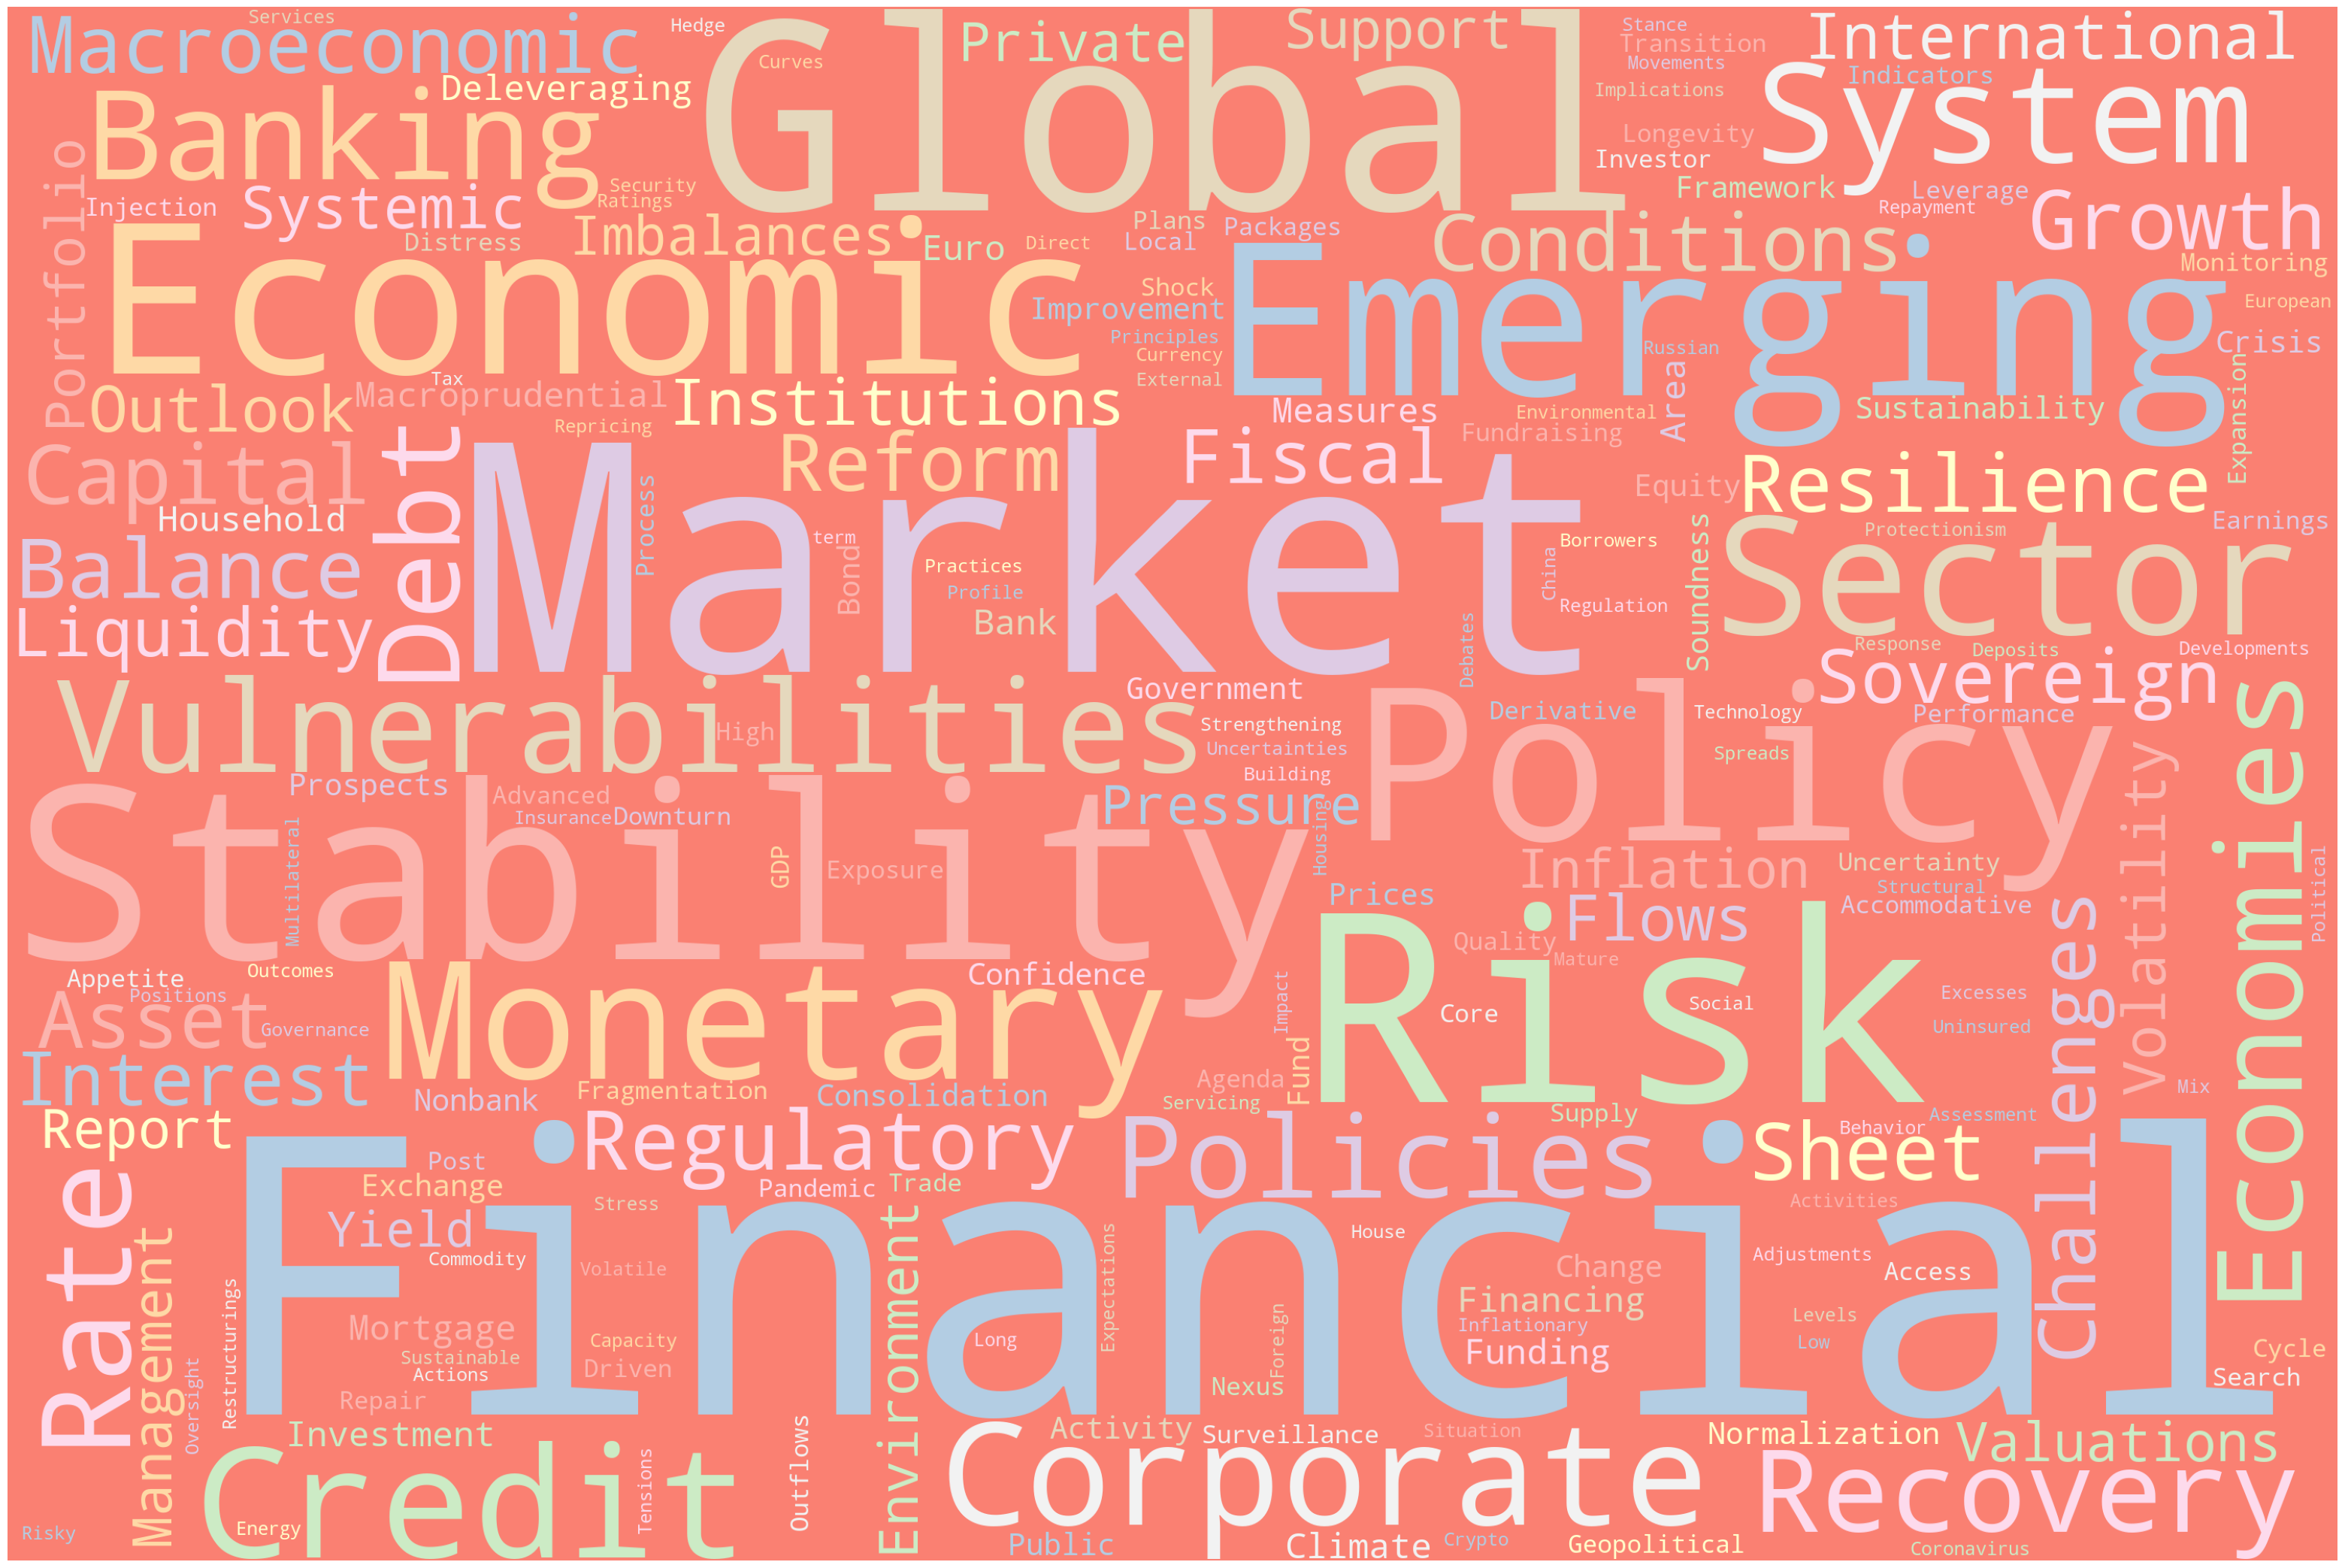

In [631]:
from wordcloud import WordCloud
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
# Import package

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(wordclouddeneme)
# Plot
plot_cloud(wordcloud)

In [632]:
topics_excel= pd.read_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/PHD/OptimizedSimilarityF1_Article_LLMLangchainOutputs.xlsx')
topics_excel.head()#######################

Unnamed: 0  index                                             Topics
0           0      0  International Monetary Fund, Coronavirus Pande...
1           1      1  Global Economic Outlook, Financial Stability, ...
2           2      2  Global Financial System, Monetary Policy Norma...
3           3      3  Global Economic Outlook, Monetary Policy Stanc...
4           4      4  Financial Conditions, Corporate Sector Debt, S...

In [633]:
df_list

['x international monetary fund | april 2020 the coronavirus (covid-19) pandemic presents a historic challenge. in mid-february, when market participants started to fear that the outbreak would become a global pandemic, the prices of equities fell sharply, from previously overstretched levels. in credit markets, spreads skyrocketed, especially in risky segments such as high-yield bonds, leveraged loans, and private debt, where issuance essentially came to a halt. oil prices plummeted in the face of weakening global demand and the failure of the opec+ countries to reach an agreement on output cuts, adding a further leg to the deterioration in risk appetite. these volatile market conditions led to a flight to quality, with yields on safe-haven bonds declining abruptly. a number of factors amplified asset price moves, contributing to a sharp tightening of financial conditions at unprecedented speed. signs of strain emerged in major short-term funding markets, including the global market f

In [634]:
clean_text

['International Monetary Fund, Coronavirus Pandemic, Global Financial Markets, Credit Markets, Portfolio Flows, Debt Restructurings, Monetary Policy, Fiscal Support Packages, Financial Stability, Economic Activity',
 'Global Economic Outlook, Financial Stability, Monetary Policy, Inflation Risks, Risky Asset Prices, Financial Vulnerabilities, Banking Sector Resilience, Regulatory Reforms, Emerging Market Economies, Crypto Assets',
 'Global Financial System, Monetary Policy Normalization, Financial Stability Risks, Asset Valuations, Nonbank Sector Vulnerabilities, Debt Servicing Pressures, Economic Recovery, Portfolio Adjustments, Emerging Market Economies, Financial Excesses',
 'Global Economic Outlook, Monetary Policy Stance, Corporate Sector Vulnerabilities, Search for Yield, Nonbank Financial Institutions, Capital Flows to Emerging Markets, Debt Sustainability Risks, Banking Sector Resilience, Environmental, Social, and Governance Principles, Macroeconomic and Macroprudential Polici

In [635]:
# Format topics and corpus
topics_input = " ".join(clean_text)
corpus_input = " ".join(df_list)  # Flattening the corpus for simplicity

In [636]:
topics_input

"International Monetary Fund, Coronavirus Pandemic, Global Financial Markets, Credit Markets, Portfolio Flows, Debt Restructurings, Monetary Policy, Fiscal Support Packages, Financial Stability, Economic Activity Global Economic Outlook, Financial Stability, Monetary Policy, Inflation Risks, Risky Asset Prices, Financial Vulnerabilities, Banking Sector Resilience, Regulatory Reforms, Emerging Market Economies, Crypto Assets Global Financial System, Monetary Policy Normalization, Financial Stability Risks, Asset Valuations, Nonbank Sector Vulnerabilities, Debt Servicing Pressures, Economic Recovery, Portfolio Adjustments, Emerging Market Economies, Financial Excesses Global Economic Outlook, Monetary Policy Stance, Corporate Sector Vulnerabilities, Search for Yield, Nonbank Financial Institutions, Capital Flows to Emerging Markets, Debt Sustainability Risks, Banking Sector Resilience, Environmental, Social, and Governance Principles, Macroeconomic and Macroprudential Policies Financial 

In [637]:
corpus_input

'x international monetary fund | april 2020 the coronavirus (covid-19) pandemic presents a historic challenge. in mid-february, when market participants started to fear that the outbreak would become a global pandemic, the prices of equities fell sharply, from previously overstretched levels. in credit markets, spreads skyrocketed, especially in risky segments such as high-yield bonds, leveraged loans, and private debt, where issuance essentially came to a halt. oil prices plummeted in the face of weakening global demand and the failure of the opec+ countries to reach an agreement on output cuts, adding a further leg to the deterioration in risk appetite. these volatile market conditions led to a flight to quality, with yields on safe-haven bonds declining abruptly. a number of factors amplified asset price moves, contributing to a sharp tightening of financial conditions at unprecedented speed. signs of strain emerged in major short-term funding markets, including the global market fo

In [638]:
# Calculate Diversity
def calculate_diversity(topics):
    unique_words = set(word for topic in topics for word in topic)
    total_words = sum(len(topic) for topic in topics)
    diversity = len(unique_words) / total_words
    return diversity

In [639]:
topics=[]
for i in range(len(clean_text)):
    topics.append([clean_text[i]])
topics

[['International Monetary Fund, Coronavirus Pandemic, Global Financial Markets, Credit Markets, Portfolio Flows, Debt Restructurings, Monetary Policy, Fiscal Support Packages, Financial Stability, Economic Activity'],
 ['Global Economic Outlook, Financial Stability, Monetary Policy, Inflation Risks, Risky Asset Prices, Financial Vulnerabilities, Banking Sector Resilience, Regulatory Reforms, Emerging Market Economies, Crypto Assets'],
 ['Global Financial System, Monetary Policy Normalization, Financial Stability Risks, Asset Valuations, Nonbank Sector Vulnerabilities, Debt Servicing Pressures, Economic Recovery, Portfolio Adjustments, Emerging Market Economies, Financial Excesses'],
 ['Global Economic Outlook, Monetary Policy Stance, Corporate Sector Vulnerabilities, Search for Yield, Nonbank Financial Institutions, Capital Flows to Emerging Markets, Debt Sustainability Risks, Banking Sector Resilience, Environmental, Social, and Governance Principles, Macroeconomic and Macroprudential

In [640]:
diversity_score = calculate_diversity(topics)
diversity_score

1.0

In [641]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import numpy as np
# Semantic Similarity
model = SentenceTransformer('all-MiniLM-L6-v2')  # Use a lightweight sentence transformer
topic_embeddings = [model.encode(" ".join(topic)) for topic in topics]
similarity_matrix = cosine_similarity(topic_embeddings)

# Mean Pairwise Similarity (Lower = More Diverse Topics)
mean_similarity = np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)])

# Print Results
print(f"Diversity Score: {diversity_score}")
print(f"Mean Semantic Similarity: {mean_similarity}")

Diversity Score: 1.0
Mean Semantic Similarity: 0.7600800395011902
